In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [2]:
x,y=mnist['data'],mnist['target']

In [3]:
x.shape, y.shape

((70000, 784), (70000,))

In [4]:
import matplotlib
import matplotlib.pyplot as plt

(-0.5, 27.5, 27.5, -0.5)

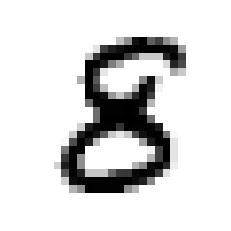

In [5]:
some_digit=x[3601]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')

In [6]:
y[3601]

'8'

In [7]:
x_train,x_test=x[0:6000],x[6000:7000]
y_train,y_test=y[0:6000],y[6000:7000]

In [8]:
import numpy as np
shuffle_index = np.random.permutation(6000)
x_train, y_train=x_train[shuffle_index], y_train[shuffle_index]

In [9]:
y_train

array(['4', '1', '8', ..., '8', '7', '8'], dtype=object)

### Creating a 2 detector

In [10]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_2=(y_train==2)
y_test_2=(y_test==2)

In [11]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(tol=0.1, solver='lbfgs')
clf.fit(x_train, y_train_2)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [12]:
clf.predict([some_digit])

array([False])

In [13]:
from sklearn.model_selection import cross_val_score
a= cross_val_score(clf, x_train, y_train_2, cv=5, scoring='accuracy')

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [14]:
a

array([0.95833333, 0.95333333, 0.94916667, 0.9425    , 0.95166667])

In [15]:
a.mean()

0.951

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_pred= cross_val_predict(clf, x_train, y_train_2, cv=3)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [17]:
y_train_pred

array([False, False, False, ..., False, False, False])

### Calculate confusion matric

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_2, y_train_pred)

array([[5270,  149],
       [ 125,  456]], dtype=int64)

In [19]:
confusion_matrix(y_train_2, y_train_2)

array([[5419,    0],
       [   0,  581]], dtype=int64)

### Precision and Recall

In [20]:
from sklearn.metrics import precision_score,recall_score, f1_score

In [21]:
precision_score(y_train_2, y_train_pred)

0.7537190082644628

In [22]:
recall_score(y_train_2, y_train_pred)

0.7848537005163512

In [23]:
f1_score(y_train_2, y_train_pred)

0.7689713322091063

### Precision Recall Curve

In [24]:
from sklearn.metrics import precision_recall_curve
y_score= cross_val_predict(clf, x_train, y_train_2, cv=3, method='decision_function')

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [25]:
y_score

array([ -89.4287102 ,  -55.44747033,  -15.05890267, ...,  -78.53604447,
        -63.19182141, -104.62420709])

In [26]:
precision, recall, thresholds = precision_recall_curve(y_train_2, y_score)

In [27]:
precision

array([0.10100834, 0.10085203, 0.10086957, ..., 1.        , 1.        ,
       1.        ])

In [28]:
recall

array([1.        , 0.99827883, 0.99827883, ..., 0.00344234, 0.00172117,
       0.        ])

In [29]:
thresholds

array([-232.77503014, -232.39316425, -232.00108103, ...,  176.50498187,
        181.57209653,  187.00688745])

### Plotting Precision Recall Curve

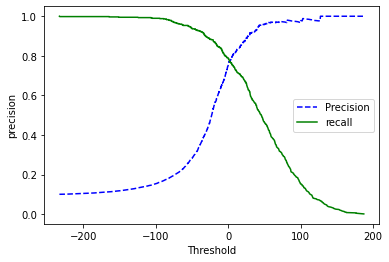

In [30]:
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='recall')
plt.xlabel('Threshold')
plt.ylabel('precision')
plt.legend()

In [40]:
from sklearn.metrics import roc_curve, auc

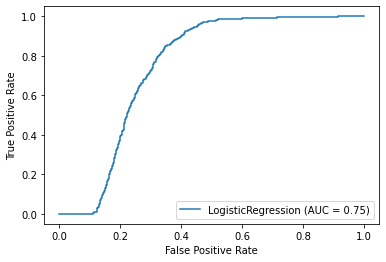

In [43]:
import sklearn
sklearn.metrics.plot_roc_curve(clf,x_train, y_train)

In [44]:
sklearn.metrics.roc_auc_score(clf,x_train, y_train)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass average=[4 1 8 ... 8 7 8] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


ValueError: Expected array-like (array or non-string sequence), got LogisticRegression(tol=0.1)